In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

import re, os
import unicodedata
import json

import nltk
import nltk.sentiment
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from time import strftime

from wordcloud import WordCloud

from pprint import pprint

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

import acquire

import spacy
pd.set_option('display.max_colwidth', None)



### Acquire data

We will be using the 1000 labeled notes in `test.csv`

In [2]:
# Load test data labels
df = pd.read_csv('train.csv')

In [3]:
df.head()

id  case_num  pn_num  feature_num  \
0  00016_000         0      16            0   
1  00016_001         0      16            1   
2  00016_002         0      16            2   
3  00016_003         0      16            3   
4  00016_004         0      16            4   

                                 annotation              location  
0          ['dad with recent heart attcak']           ['696 724']  
1             ['mom with "thyroid disease']           ['668 693']  
2                        ['chest pressure']           ['203 217']  
3      ['intermittent episodes', 'episode']  ['70 91', '176 183']  
4  ['felt as if he were going to pass out']           ['222 258']

In [4]:
df.shape

(14300, 6)

In [5]:
notes = pd.read_csv('patient_notes.csv')

In [6]:
notes.head(1)

pn_num  case_num  \
0       0         0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                pn_history  
0  17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment\r\n-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav\r\n-associated with dispnea on exersion and rest,stressed out about school\r\n-reports fe feels like his heart is jumping out of his chest\r\n-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam\r\n-pmh:non,meds :aderol (from a friend),nkda\r\n-fh:father had MI recently,mother has thyroid dz\r\n-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school\r\n-sh:no std

In [7]:
df = df.merge(notes, how='inner', on='pn_num')

In [8]:
notes.shape

(42146, 3)

In [9]:
df.shape

(14300, 8)

In [10]:
notes.head(1)

pn_num  case_num  \
0       0         0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                pn_history  
0  17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment\r\n-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav\r\n-associated with dispnea on exersion and rest,stressed out about school\r\n-reports fe feels like his heart is jumping out of his chest\r\n-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam\r\n-pmh:non,meds :aderol (from a friend),nkda\r\n-fh:father had MI recently,mother has thyroid dz\r\n-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school\r\n-sh:no std

In [11]:
df.head(1)

id  case_num_x  pn_num  feature_num  \
0  00016_000           0      16            0   

                         annotation     location  case_num_y  \
0  ['dad with recent heart attcak']  ['696 724']           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               pn_history  
0  HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of "heart beating/pounding out of my chest." 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with "thyroid disease," dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms

In [12]:
import prepare_jag

In [13]:
df.head(1)

id  case_num_x  pn_num  feature_num  \
0  00016_000           0      16            0   

                         annotation     location  case_num_y  \
0  ['dad with recent heart attcak']  ['696 724']           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               pn_history  
0  HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of "heart beating/pounding out of my chest." 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with "thyroid disease," dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms

In [14]:
df.rename(columns={'pn_history': 'original'}, inplace=True)


In [15]:
df = prepare_jag.prep_article_data(df, 'original', extra_words=[], exclude_words=['no'])


Renamed 'pn_history' column to 'original'
Added a basic clean column lowercaseing and removing special characters
Added stemmed column with tokenized words and stopwords removed
Added lemmatized column with lemmatized words and stopwords removed
Data preparation complete


In [16]:
df.head(1)


id  case_num_x  pn_num  feature_num  \
0  00016_000           0      16            0   

                         annotation     location  case_num_y  \
0  ['dad with recent heart attcak']  ['696 724']           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 original  \
0  HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of "heart beating/pounding out of my chest." 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with "thyroid disease," dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   clean  \
0  hpi 17yo presents palpitations patient reports 34 months intermittent episodes heart beatingpounding chest 2 days ago soccer game episode time chest pressure felt going pass lose conciousness note patient endorses abusing adderall primarily study 13 times per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fevers chills headache fatigue changes sleep changes visionhearing abdominal paun changes bowel urinary habits pmhx none rx uses friends adderrall fhx mom thyroid disease dad recent heart attcak none immunizations date shx freshmen college endorses 34 drinks 3 nights week weekends denies tabacco endorses trying marijuana sexually active girlfriend x 1 year uses condoms   

                                                                                                                                                                                                                                                                                                                                                                                                                  

---

In [17]:
# Look at distribution of cases
cases = pd.concat([df.case_num_x.value_counts(), df.case_num_x.value_counts(normalize = True)], axis = 1)
cases.columns = ['n', 'percent']
cases

n   percent
5  1800  0.125874
8  1800  0.125874
2  1700  0.118881
9  1700  0.118881
3  1600  0.111888
0  1300  0.090909
1  1300  0.090909
6  1200  0.083916
4  1000  0.069930
7   900  0.062937

<AxesSubplot:ylabel='n'>

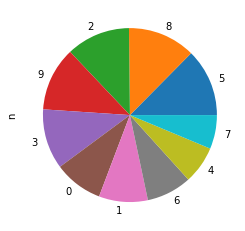

In [18]:
cases.n.plot.pie()

Make word lists by case from lemmatized words



In [19]:
df.head(1)

id  case_num_x  pn_num  feature_num  \
0  00016_000           0      16            0   

                         annotation     location  case_num_y  \
0  ['dad with recent heart attcak']  ['696 724']           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 original  \
0  HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of "heart beating/pounding out of my chest." 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with "thyroid disease," dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   clean  \
0  hpi 17yo presents palpitations patient reports 34 months intermittent episodes heart beatingpounding chest 2 days ago soccer game episode time chest pressure felt going pass lose conciousness note patient endorses abusing adderall primarily study 13 times per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fevers chills headache fatigue changes sleep changes visionhearing abdominal paun changes bowel urinary habits pmhx none rx uses friends adderrall fhx mom thyroid disease dad recent heart attcak none immunizations date shx freshmen college endorses 34 drinks 3 nights week weekends denies tabacco endorses trying marijuana sexually active girlfriend x 1 year uses condoms   

                                                                                                                                                                                                                                                                                                                                                                                                                  

In [20]:
#Make word lists by case_num_xs from lemmatized words
case0_words = ' '.join(df[df.case_num_x == 0].lemmatized).split()
case1_words = ' '.join(df[df.case_num_x == 1].lemmatized).split()
case2_words = ' '.join(df[df.case_num_x == 2].lemmatized).split()
case3_words = ' '.join(df[df.case_num_x == 3].lemmatized).split()
case4_words = ' '.join(df[df.case_num_x == 4].lemmatized).split()
case5_words = ' '.join(df[df.case_num_x == 5].lemmatized).split()
case6_words = ' '.join(df[df.case_num_x == 6].lemmatized).split()
case7_words = ' '.join(df[df.case_num_x == 7].lemmatized).split()
case8_words = ' '.join(df[df.case_num_x == 8].lemmatized).split()
case9_words = ' '.join(df[df.case_num_x == 9].lemmatized).split()
all_words = ' '.join(df.lemmatized).split()


In [21]:
# Look at word list lengths
print('Case0 words: '+str(len(case0_words)))
print('Case1 words: '+str(len(case1_words)))
print('Case2 words: '+str(len(case2_words)))
print('Case3 words: '+str(len(case3_words)))
print('Case4 words: '+str(len(case4_words)))
print('Case5 words: '+str(len(case5_words)))
print('Case6 words: '+str(len(case6_words)))
print('Case7 words: '+str(len(case7_words)))
print('Case8 words: '+str(len(case8_words)))
print('Case9 words: '+str(len(case9_words)))
print('All words: '+str(len(all_words)))

Case0 words: 126295
Case1 words: 128713
Case2 words: 177259
Case3 words: 152768
Case4 words: 93720
Case5 words: 175482
Case6 words: 115464
Case7 words: 94122
Case8 words: 184482
Case9 words: 149362
All words: 1397667


In [22]:
# Calculate word frequencies
case0_freq = pd.Series(case0_words).value_counts()
case1_freq = pd.Series(case1_words).value_counts()
case2_freq = pd.Series(case2_words).value_counts()
case3_freq = pd.Series(case3_words).value_counts()
case4_freq = pd.Series(case4_words).value_counts()
case5_freq = pd.Series(case5_words).value_counts()
case6_freq = pd.Series(case6_words).value_counts()
case7_freq = pd.Series(case7_words).value_counts()
case8_freq = pd.Series(case8_words).value_counts()
case9_freq = pd.Series(case9_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [23]:
# Look at 20 most common words
word_counts = (pd.concat([all_freq, case0_freq, case1_freq, case2_freq, case3_freq, case4_freq, case5_freq, case6_freq, case7_freq, case8_freq, case9_freq], axis = 1, sort = True)
                .set_axis(['all', 'Case0', 'Case1', 'Case2', 'Case3', 'Case4', 'Case5', 'Case6', 'Case7', 'Case8', 'Case9'], axis = 1, inplace = False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
word_counts.sort_values(by = 'all', ascending = False).head(20)

all  Case0  Case1  Case2  Case3  Case4  Case5  Case6  Case7  Case8  \
no       44027   3458   4511   5729   5824   2650   6246   2772   3366   4932   
ha       26941   2210   2548   3060   2832   2060   2448   1632   1809   4500   
pain     24710    819   4992   1445   7376    530   1062   4380    792    594   
denies   17903   1859   1508   2176   1680   1590   2088   1596   1098   2268   
none     17403   1664   2119   1207   1904   1330   3618    972   1692    738   
ago      16811   1248   2626   2703    848    630   4122    780   1278   1998   
week     14946    793    988   1428   1888   1540   3780    156    306   2826   
day      13993    871   2015   3366    784    440   1260   1500   1458   1296   
change   12452   1378    520   2278   1040   1250   1530    672   1161   1620   
2        12241    715   1456   2278   2336    430   2106    216   1431    270   
last     12146   1898   1976   2788    736    290   1638    720   1269    576   
year     11205    663    299   3621   1120    330   1890    300    909   1206   
month    10947   1716   1755   1581   1568    210    918    420   2637    108   
pmh       9738    871    793   1309   1120    660   1170    828    621   1278   
3         8898    351    208   2380    192    190   1980    192    351   2340   
episode   8897   2652    806    612    352    240   3276     96      0    234   
use       8722   1014    923    799    992    640   1188   1008    702    504   
ro        8375    793    676    884   1072    650   1044    804    549    900   
med       8352    806    780   1003    976    500    990    708    540   1080   
yo        8323    806    728    969    976    650    900    708    603   1116   

         Case9  
no        4539  
ha        3842  
pain      2720  
denies    2040  
none      2159  
ago        578  
week      1241  
day       1003  
change    1003  
2         1003  
last       255  
year       867  
month       34  
pmh       1088  
3          714  
episode    629  
use        952  
ro        1003  
med        969  
yo         867

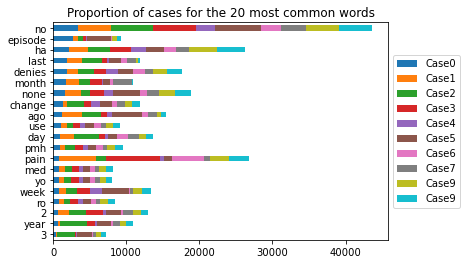

In [24]:
# figure out the percentage of language in words
(word_counts
 .assign(p_case0 = word_counts.Case0 / word_counts['all'],
        p_case1 = word_counts.Case1 / word_counts['all'],
        p_case2 = word_counts.Case2 / word_counts['all'],
        p_case3 = word_counts.Case3 / word_counts['all'],
        p_case4 = word_counts.Case4 / word_counts['all'],
        p_case5 = word_counts.Case5 / word_counts['all'],
        p_case6 = word_counts.Case6 / word_counts['all'],
        p_case7 = word_counts.Case7 / word_counts['all'],
        p_case8 = word_counts.Case8 / word_counts['all'],
        p_case9 = word_counts.Case9 / word_counts['all'])
        
 .sort_values(by = 'all')
 [['Case0', 'Case1', 'Case2', 'Case3', 'Case4', 'Case5', 'Case6', 'Case7', 'Case9', 'Case9']]
 .tail(20)
 .sort_values('Case0')
 .plot.barh(stacked=True))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Proportion of cases for the 20 most common words');

### Look at bigrams by case

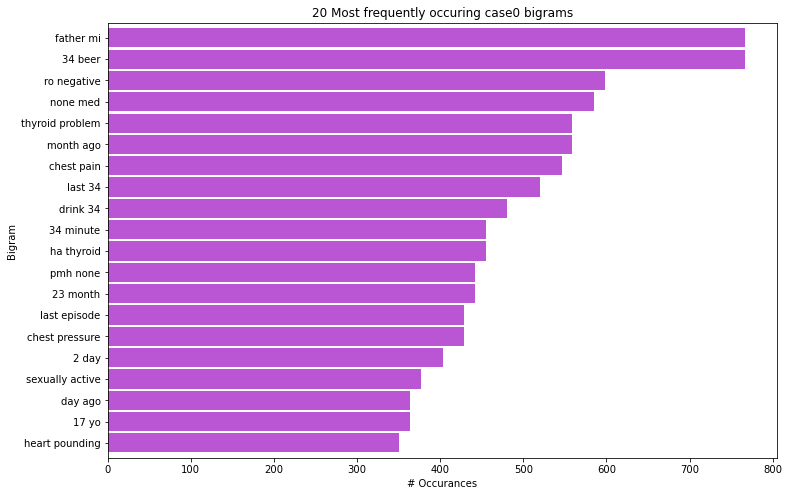

In [25]:
# Calculate Case 0bigrams
case0_bigrams = (pd.Series(nltk.ngrams(case0_words, 2))
                      .value_counts()
                      .head(20))
# Vizualize top case0 Bigrams
case0_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Most frequently occuring case0 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case0_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

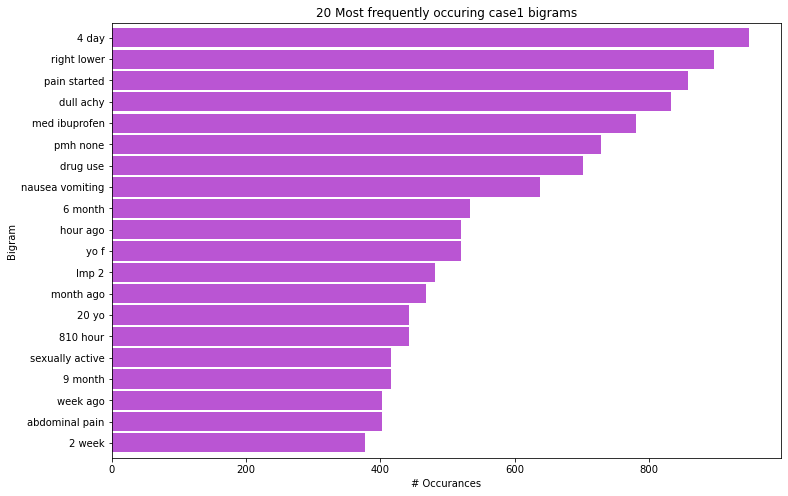

In [26]:
# Calculate Case 0bigrams
case1_bigrams = (pd.Series(nltk.ngrams(case1_words, 2))
                      .value_counts()
                      .head(20))
# Vizualize top case1 Bigrams
case1_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Most frequently occuring case1 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case1_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

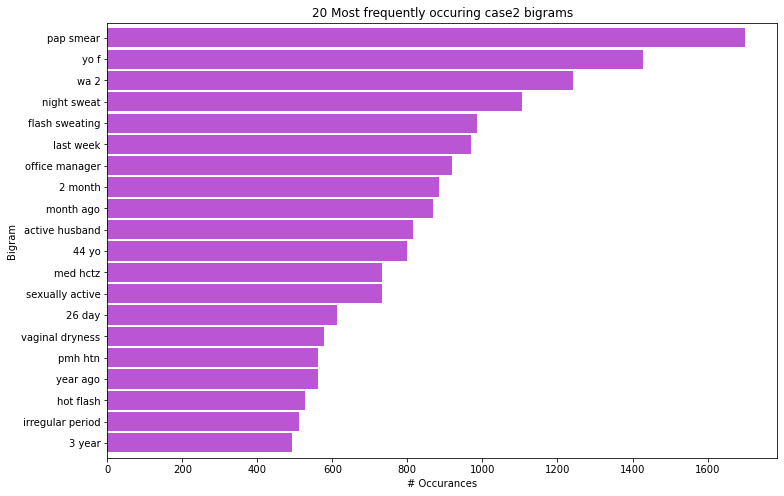

In [27]:
# Calculate Case 0bigrams
case2_bigrams = (pd.Series(nltk.ngrams(case2_words, 2))
                      .value_counts()
                      .head(20))
# Vizualize top case2 Bigrams
case2_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Most frequently occuring case2 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case2_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

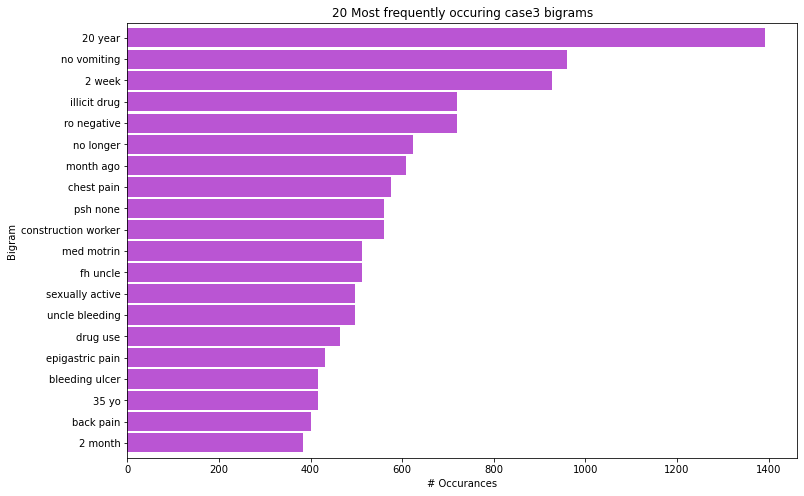

In [28]:
# Calculate Case 0bigrams
case3_bigrams = (pd.Series(nltk.ngrams(case3_words, 2))
                      .value_counts()
                      .head(20))
# Vizualize top case3 Bigrams
case3_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Most frequently occuring case3 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case3_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

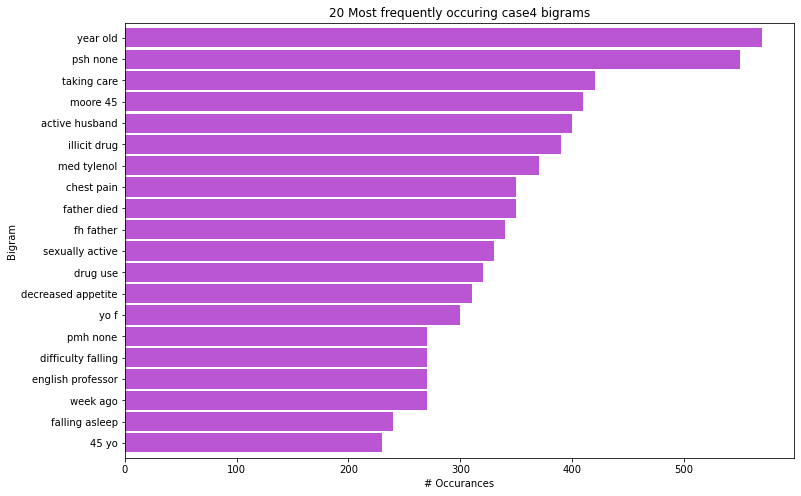

In [29]:
# Calculate Case 0bigrams
case4_bigrams = (pd.Series(nltk.ngrams(case4_words, 2))
                      .value_counts()
                      .head(20))
# Vizualize top case4 Bigrams
case4_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Most frequently occuring case4 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case4_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

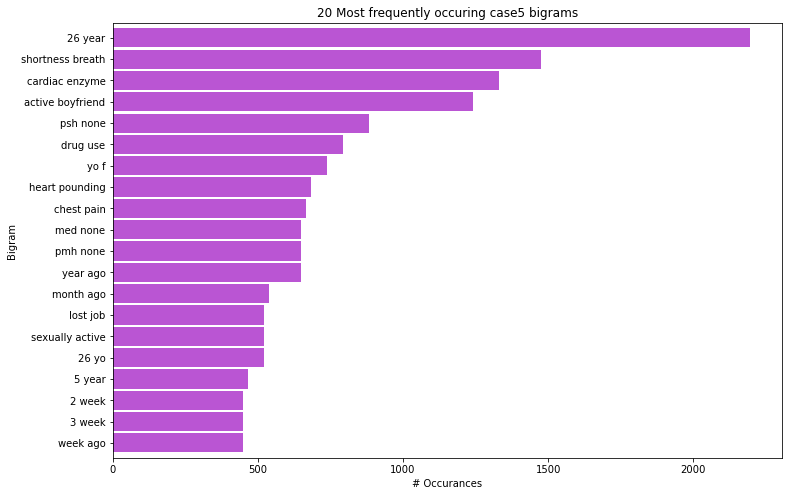

In [30]:
# Calculate Case 0bigrams
case5_bigrams = (pd.Series(nltk.ngrams(case5_words, 2))
                      .value_counts()
                      .head(20))
# Vizualize top case5 Bigrams
case5_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Most frequently occuring case5 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case5_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

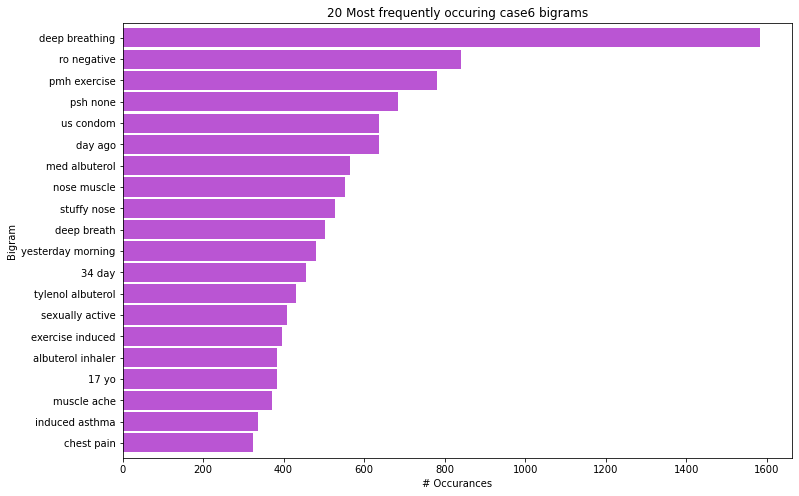

In [31]:
# Calculate Case 0bigrams
case6_bigrams = (pd.Series(nltk.ngrams(case6_words, 2))
                      .value_counts()
                      .head(20))
# Vizualize top case6 Bigrams
case6_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Most frequently occuring case6 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case6_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

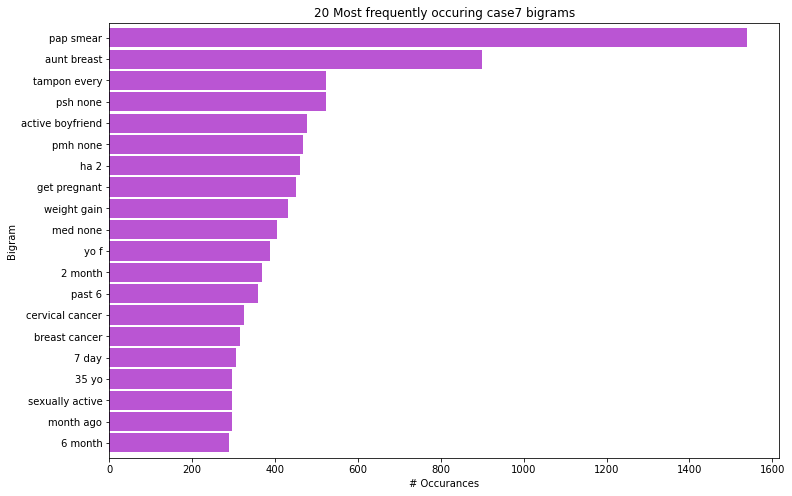

In [32]:
# Calculate Case 0bigrams
case7_bigrams = (pd.Series(nltk.ngrams(case7_words, 2))
                      .value_counts()
                      .head(20))
# Vizualize top case7 Bigrams
case7_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Most frequently occuring case7 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case7_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

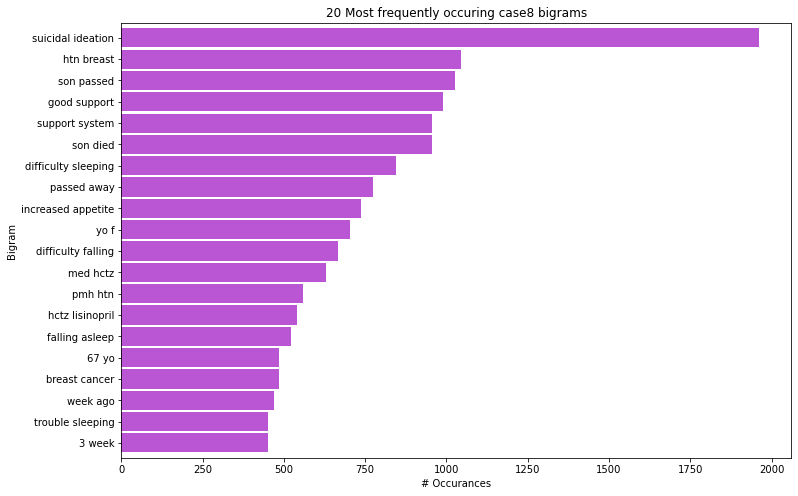

In [33]:
# Calculate Case 0bigrams
case8_bigrams = (pd.Series(nltk.ngrams(case8_words, 2))
                      .value_counts()
                      .head(20))
# Vizualize top case8 Bigrams
case8_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Most frequently occuring case8 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case8_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

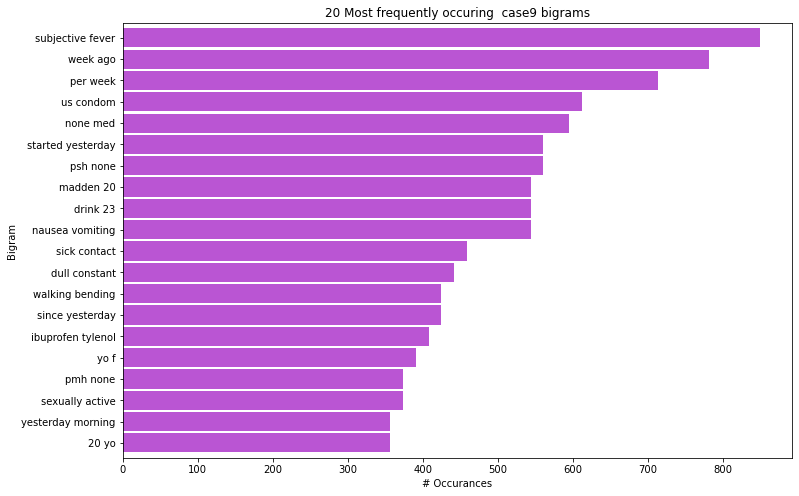

In [34]:
# Calculate Case 0bigrams
case9_bigrams = (pd.Series(nltk.ngrams( case9_words, 2))
                      .value_counts()
                      .head(20))
# Vizualize top  case9 Bigrams
case9_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Most frequently occuring  case9 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels =  case9_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

[ ] Trigrams?

---

### Word Clouds

In [35]:
# Create word clouds for all words and language families
all_cloud = WordCloud(background_color = 'white', height = 1600, width = 800).generate(' '.join(all_words))
case0_cloud = WordCloud(background_color = 'white', height = 800, width = 800).generate(' '.join(case0_words))
case1_cloud = WordCloud(background_color = 'white', height = 800, width = 800).generate(' '.join(case1_words))
case2_cloud = WordCloud(background_color = 'white', height = 800, width = 800).generate(' '.join(case2_words))
case3_cloud = WordCloud(background_color = 'white', height = 800, width = 800).generate(' '.join(case3_words))
case4_cloud = WordCloud(background_color = 'white', height = 800, width = 800).generate(' '.join(case4_words))
case5_cloud = WordCloud(background_color = 'white', height = 800, width = 800).generate(' '.join(case5_words))
case6_cloud = WordCloud(background_color = 'white', height = 800, width = 800).generate(' '.join(case6_words))
case7_cloud = WordCloud(background_color = 'white', height = 800, width = 800).generate(' '.join(case7_words))
case8_cloud = WordCloud(background_color = 'white', height = 800, width = 800).generate(' '.join(case8_words))
case9_cloud = WordCloud(background_color = 'white', height = 800, width = 800).generate(' '.join(case9_words))



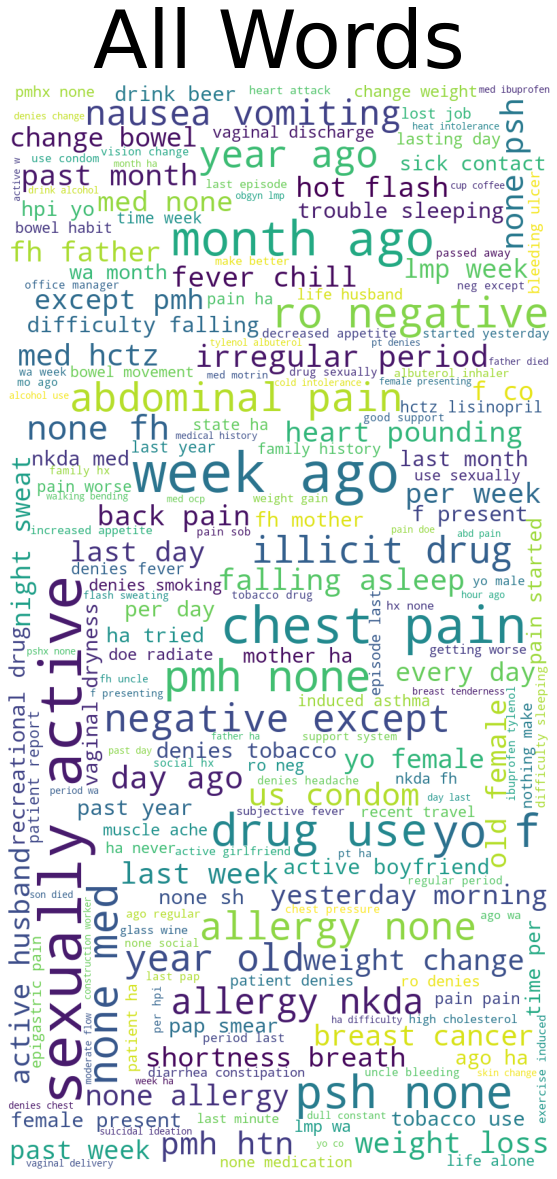

In [36]:
plt.figure(figsize = (10, 20))
plt.imshow(all_cloud);
plt.title('All Words', fontsize=80)
plt.axis('off');

(-0.5, 799.5, 799.5, -0.5)

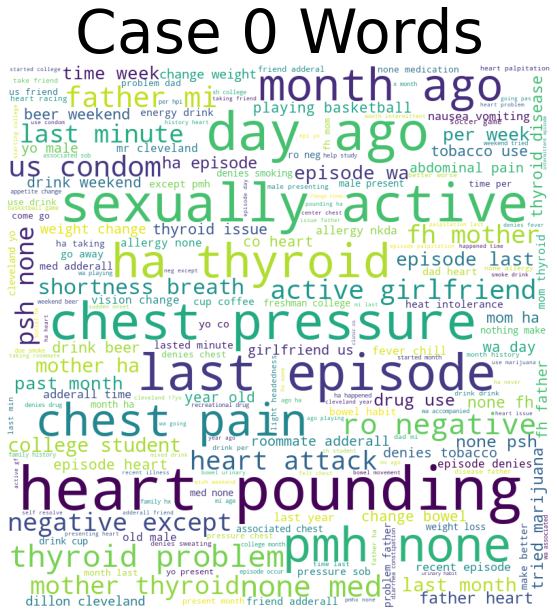

In [37]:
plt.figure(figsize = (10, 10))
plt.imshow(case0_cloud);
plt.title('Case 0 Words', fontsize=60)
plt.axis('off')


(-0.5, 799.5, 799.5, -0.5)

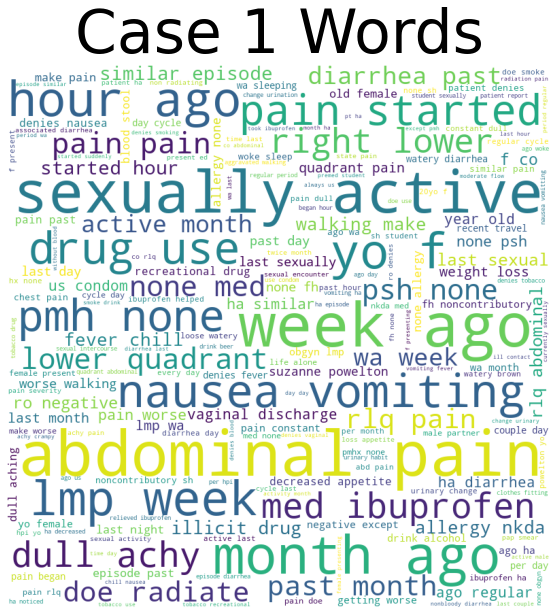

In [38]:
plt.figure(figsize = (10, 10))
plt.imshow(case1_cloud);
plt.title('Case 1 Words', fontsize=60)
plt.axis('off')


(-0.5, 799.5, 799.5, -0.5)

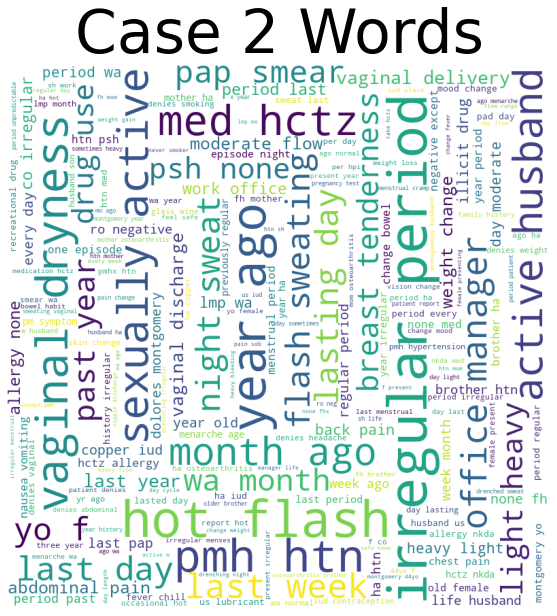

In [39]:
plt.figure(figsize = (10, 10))
plt.imshow(case2_cloud);
plt.title('Case 2 Words', fontsize=60)
plt.axis('off')


(-0.5, 799.5, 799.5, -0.5)

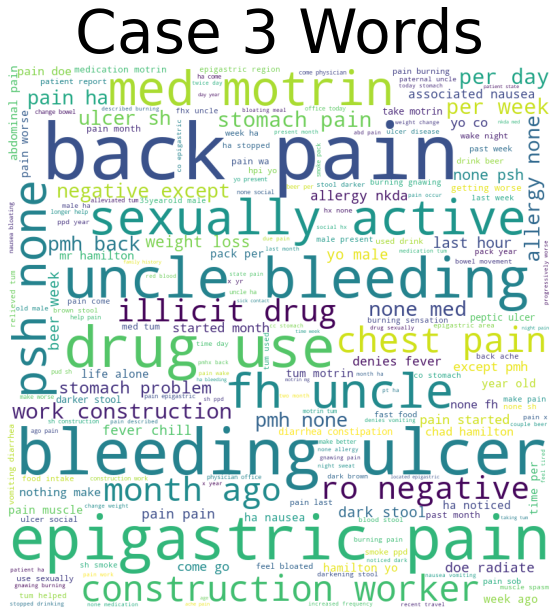

In [40]:
plt.figure(figsize = (10, 10))
plt.imshow(case3_cloud);
plt.title('Case 3 Words', fontsize=60)
plt.axis('off')


(-0.5, 799.5, 799.5, -0.5)

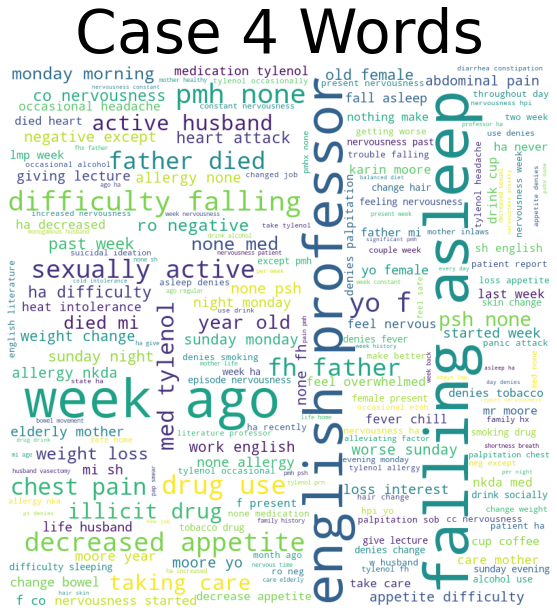

In [41]:
plt.figure(figsize = (10, 10))
plt.imshow(case4_cloud);
plt.title('Case 4 Words', fontsize=60)
plt.axis('off')


(-0.5, 799.5, 799.5, -0.5)

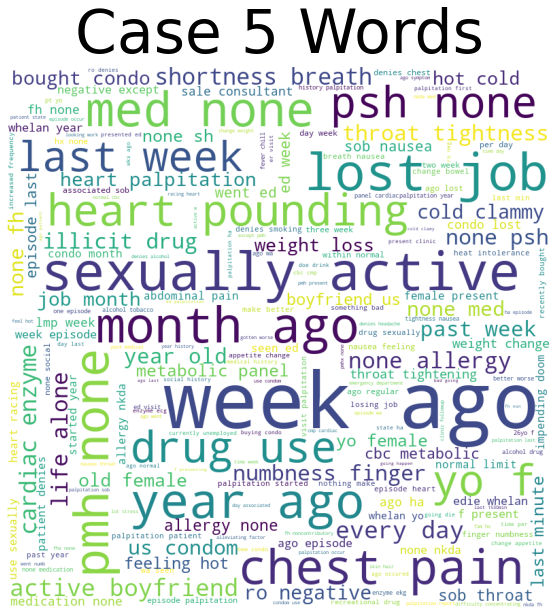

In [42]:
plt.figure(figsize = (10, 10))
plt.imshow(case5_cloud);
plt.title('Case 5 Words', fontsize=60)
plt.axis('off')


(-0.5, 799.5, 799.5, -0.5)

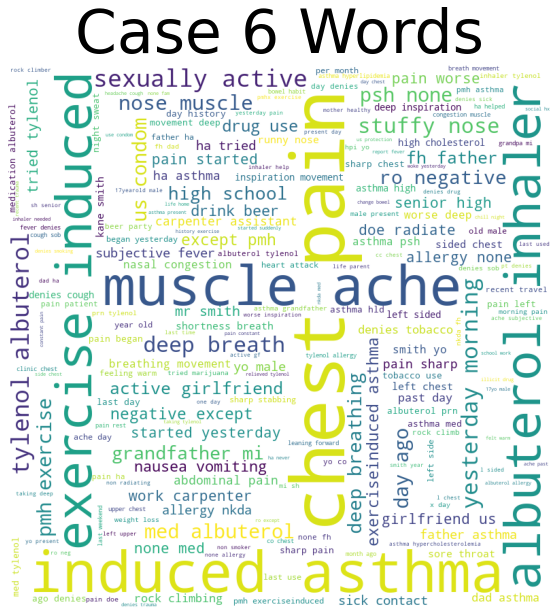

In [43]:
plt.figure(figsize = (10, 10))
plt.imshow(case6_cloud);
plt.title('Case 6 Words', fontsize=60)
plt.axis('off')


(-0.5, 799.5, 799.5, -0.5)

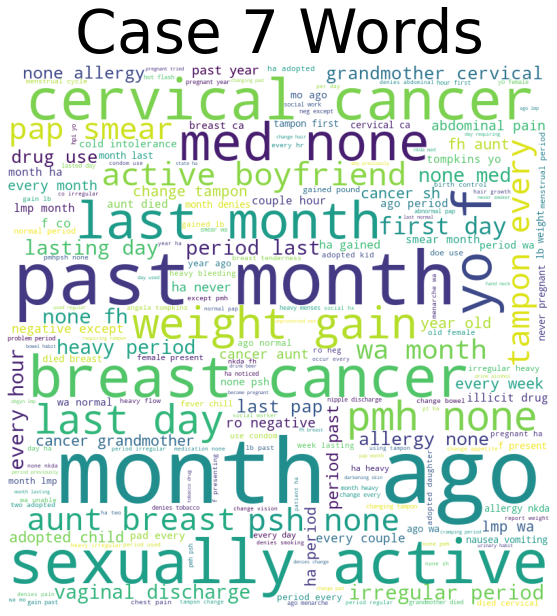

In [44]:
plt.figure(figsize = (10, 10))
plt.imshow(case7_cloud);
plt.title('Case 7 Words', fontsize=60)
plt.axis('off')


(-0.5, 799.5, 799.5, -0.5)

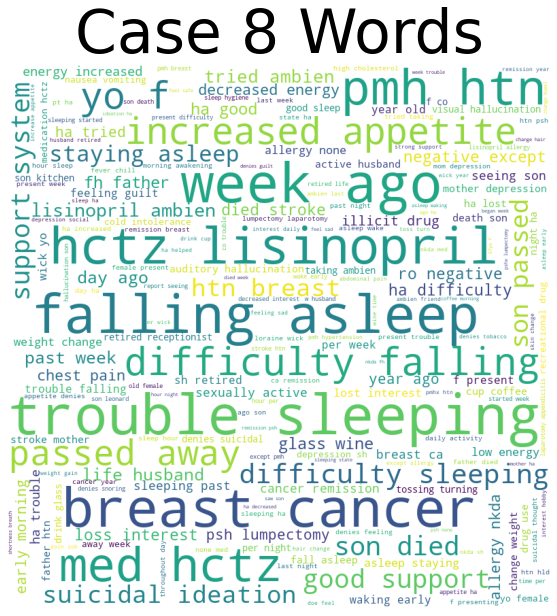

In [45]:
plt.figure(figsize = (10, 10))
plt.imshow(case8_cloud);
plt.title('Case 8 Words', fontsize=60)
plt.axis('off')


(-0.5, 799.5, 799.5, -0.5)

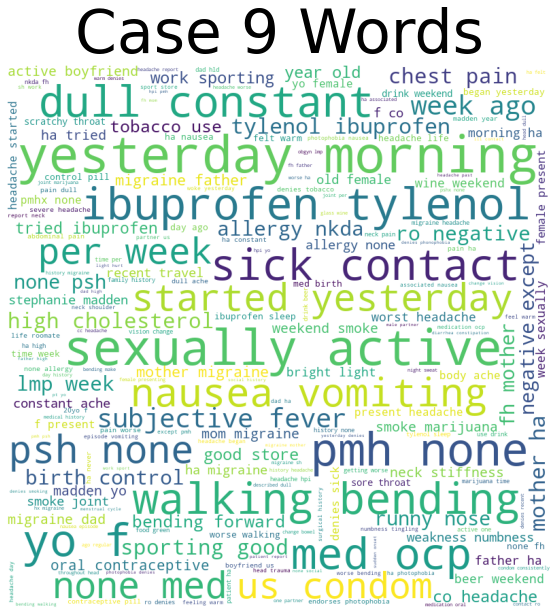

In [46]:
plt.figure(figsize = (10, 10))
plt.imshow(case9_cloud);
plt.title('Case 9 Words', fontsize=60)
plt.axis('off')


---

## Modeling

### Split Data

- Split in to train / test (700/300)


### X/y split

- Let x be the TFID vectorization of the lemmatized word list
- y = case number

In [47]:
df.head(1)

id  case_num_x  pn_num  feature_num  \
0  00016_000           0      16            0   

                         annotation     location  case_num_y  \
0  ['dad with recent heart attcak']  ['696 724']           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 original  \
0  HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of "heart beating/pounding out of my chest." 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with "thyroid disease," dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   clean  \
0  hpi 17yo presents palpitations patient reports 34 months intermittent episodes heart beatingpounding chest 2 days ago soccer game episode time chest pressure felt going pass lose conciousness note patient endorses abusing adderall primarily study 13 times per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fevers chills headache fatigue changes sleep changes visionhearing abdominal paun changes bowel urinary habits pmhx none rx uses friends adderrall fhx mom thyroid disease dad recent heart attcak none immunizations date shx freshmen college endorses 34 drinks 3 nights week weekends denies tabacco endorses trying marijuana sexually active girlfriend x 1 year uses condoms   

                                                                                                                                                                                                                                                                                                                                                                                                                  

In [48]:
df.dtypes

id             object
case_num_x      int64
pn_num          int64
feature_num     int64
annotation     object
location       object
case_num_y      int64
original       object
clean          object
stemmed        object
lemmatized     object
dtype: object

HAving issues 

In [49]:
#df.case_num_x=df.case_num_x.astype('object')

In [50]:
df.dtypes

id             object
case_num_x      int64
pn_num          int64
feature_num     int64
annotation     object
location       object
case_num_y      int64
original       object
clean          object
stemmed        object
lemmatized     object
dtype: object

Running into issue with number that isnt really a number for a target rename

In [51]:
############### Column Lambdas###############


def categorise(row):
    if row['case_num_x'] == 0:
        return 'case0'
    elif row['case_num_x'] == 1:
        return 'case1'
    elif row['case_num_x'] == 2:
        return 'case2'
    elif row['case_num_x'] == 3:
        return 'case3'
    elif row['case_num_x'] == 4:
        return 'case3'
    elif row['case_num_x'] == 5:
        return 'case5'
    elif row['case_num_x'] == 6:
        return 'case6'
    elif row['case_num_x'] == 7:
        return 'case7'
    elif row['case_num_x'] == 8:
        return 'case8'
    return 'case9'

In [52]:
    df['target'] = df.apply(lambda row: categorise(row), axis=1)


In [53]:
df.head(1)

id  case_num_x  pn_num  feature_num  \
0  00016_000           0      16            0   

                         annotation     location  case_num_y  \
0  ['dad with recent heart attcak']  ['696 724']           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 original  \
0  HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of "heart beating/pounding out of my chest." 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with "thyroid disease," dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   clean  \
0  hpi 17yo presents palpitations patient reports 34 months intermittent episodes heart beatingpounding chest 2 days ago soccer game episode time chest pressure felt going pass lose conciousness note patient endorses abusing adderall primarily study 13 times per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fevers chills headache fatigue changes sleep changes visionhearing abdominal paun changes bowel urinary habits pmhx none rx uses friends adderrall fhx mom thyroid disease dad recent heart attcak none immunizations date shx freshmen college endorses 34 drinks 3 nights week weekends denies tabacco endorses trying marijuana sexually active girlfriend x 1 year uses condoms   

                                                                                                                                                                                                                                                                                                                                                                                                                  

In [54]:
# Split X Y
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.lemmatized)
y = df.target

In [55]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)

## Baseline

In [56]:
df.target.value_counts()

case3    2600
case5    1800
case8    1800
case2    1700
case9    1700
case0    1300
case1    1300
case6    1200
case7     900
Name: target, dtype: int64

Can set baseline to be case 3

In [78]:
# baseline
df[df['target'] == 'case3'].target.value_counts()/sum(df.target.value_counts())

case3    0.181818
Name: target, dtype: float64

Baseline is 18.6%

In [76]:
#Create evaluation dataframe
train = pd.DataFrame(dict(actual=y_train))
train['baseline']='case3'


In [77]:
train.head()

actual baseline
1243   case0    case3
13593  case9    case3
5786   case3    case3
7362   case5    case3
6791   case3    case3

In [60]:
train.dtypes

actual      object
baseline    object
dtype: object

In [79]:
# Calculate baseline model performance
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.baseline)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.actual, train.baseline))
print('---')
print(classification_report(train.actual, train.baseline))


Accuracy: 18.18%
---
Confusion Matrix
baseline  case3
actual         
case0      1040
case1      1040
case2      1360
case3      2080
case5      1440
case6       960
case7       720
case8      1440
case9      1360
---
              precision    recall  f1-score   support

       case0       0.00      0.00      0.00      1040
       case1       0.00      0.00      0.00      1040
       case2       0.00      0.00      0.00      1360
       case3       0.18      1.00      0.31      2080
       case5       0.00      0.00      0.00      1440
       case6       0.00      0.00      0.00       960
       case7       0.00      0.00      0.00       720
       case8       0.00      0.00      0.00      1440
       case9       0.00      0.00      0.00      1360

    accuracy                           0.18     11440
   macro avg       0.02      0.11      0.03     11440
weighted avg       0.03      0.18      0.06     11440



/opt/homebrew/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---

## Create Models

### Logistic Regression

In [80]:
# Make and fit the object
lm = LogisticRegression().fit(X_train, y_train)
# Use it to make predictions
train['lm_predicted'] = lm.predict(X_train)
# Asssess accuracy
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.lm_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.lm_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.lm_predicted))

Accuracy: 100.00%
---
Confusion Matrix
actual        case0  case1  case2  case3  case5  case6  case7  case8  case9
lm_predicted                                                               
case0          1040      0      0      0      0      0      0      0      0
case1             0   1040      0      0      0      0      0      0      0
case2             0      0   1360      0      0      0      0      0      0
case3             0      0      0   2080      0      0      0      0      0
case5             0      0      0      0   1440      0      0      0      0
case6             0      0      0      0      0    960      0      0      0
case7             0      0      0      0      0      0    720      0      0
case8             0      0      0      0      0      0      0   1440      0
case9             0      0      0      0      0      0      0      0   1360
---
              precision    recall  f1-score   support

       case0       1.00      1.00      1.00      1040
       case1

In [81]:
cross_val_score(lm, X_train, y_train, cv = 5)


array([1., 1., 1., 1., 1.])

### Decision Tree

In [82]:
# Make and fit the object
dtc = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
# Use the object
train['dt_predicted'] = dtc.predict(X_train)
# Determine performance
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.dt_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.dt_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.dt_predicted))

Accuracy: 42.60%
---
Confusion Matrix
actual        case0  case1  case2  case3  case5  case6  case7  case8  case9
dt_predicted                                                               
case2            11     11   1295      0      0      0     56      0      0
case3          1029   1029     65   1913   1440    950    395     44   1360
case7             0      0      0      0      0      0    269      0      0
case8             0      0      0    167      0     10      0   1396      0
---
              precision    recall  f1-score   support

       case0       0.00      0.00      0.00      1040
       case1       0.00      0.00      0.00      1040
       case2       0.94      0.95      0.95      1360
       case3       0.23      0.92      0.37      2080
       case5       0.00      0.00      0.00      1440
       case6       0.00      0.00      0.00       960
       case7       1.00      0.37      0.54       720
       case8       0.89      0.97      0.93      1440
       case9   

/opt/homebrew/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
cross_val_score(dtc, X_train, y_train, cv = 5)


array([0.42482517, 0.42701049, 0.42701049, 0.42657343, 0.42438811])

### Random Forest

In [66]:
# Make and fit object
rf = RandomForestClassifier(bootstrap = True, 
                            class_weight = None, 
                            criterion = 'gini',
                            min_samples_leaf = 3,
                            n_estimators = 100,
                            max_depth = 8, 
                            random_state = 123).fit(X_train, y_train)
# Use it to make predictions
train['rf_predicted'] = rf.predict(X_train)
# Assess performance
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.rf_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.rf_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.rf_predicted))

Accuracy: 99.87%
---
Confusion Matrix
actual        case0  case1  case2  case3  case5  case6  case7  case8  case9
rf_predicted                                                               
case0          1040      0      0      0      0      0      0      0      0
case1             0   1040      0      0      0      0      0      0      0
case2             0      0   1360      0      0      0      0      0      0
case3             0      0      0   2080      0      0     15      0      0
case5             0      0      0      0   1440      0      0      0      0
case6             0      0      0      0      0    960      0      0      0
case7             0      0      0      0      0      0    705      0      0
case8             0      0      0      0      0      0      0   1440      0
case9             0      0      0      0      0      0      0      0   1360
---
              precision    recall  f1-score   support

       case0       1.00      1.00      1.00      1040
       case1 

In [83]:
cross_val_score(rf, X_train, y_train, cv = 5)


array([0.99868881, 0.99694056, 0.99956294, 1.        , 0.99694056])

### KNN

In [84]:
# Make and fit the object
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
# Use the object 
train['knn_predicted'] = knn.predict(X_train)
# Evaluate performance
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.knn_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.knn_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.knn_predicted))

Accuracy: 100.00%
---
Confusion Matrix
actual         case0  case1  case2  case3  case5  case6  case7  case8  case9
knn_predicted                                                               
case0           1040      0      0      0      0      0      0      0      0
case1              0   1040      0      0      0      0      0      0      0
case2              0      0   1360      0      0      0      0      0      0
case3              0      0      0   2080      0      0      0      0      0
case5              0      0      0      0   1440      0      0      0      0
case6              0      0      0      0      0    960      0      0      0
case7              0      0      0      0      0      0    720      0      0
case8              0      0      0      0      0      0      0   1440      0
case9              0      0      0      0      0      0      0      0   1360
---
              precision    recall  f1-score   support

       case0       1.00      1.00      1.00      1040
 

In [69]:
# 5-fold Cross Validation
cross_val_score(knn, X_train, y_train, cv = 5)


array([1., 1., 1., 1., 1.])

### Support Vector Classifier

In [70]:
# Make and fit the object
svc = LinearSVC(random_state=0).fit(X_train, y_train)
# Use the object
train['svc_predicted'] = svc.predict(X_train)
# Evaluate model
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.svc_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.svc_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.svc_predicted))

Accuracy: 100.00%
---
Confusion Matrix
actual         case0  case1  case2  case3  case5  case6  case7  case8  case9
svc_predicted                                                               
case0           1040      0      0      0      0      0      0      0      0
case1              0   1040      0      0      0      0      0      0      0
case2              0      0   1360      0      0      0      0      0      0
case3              0      0      0   2080      0      0      0      0      0
case5              0      0      0      0   1440      0      0      0      0
case6              0      0      0      0      0    960      0      0      0
case7              0      0      0      0      0      0    720      0      0
case8              0      0      0      0      0      0      0   1440      0
case9              0      0      0      0      0      0      0      0   1360
---
              precision    recall  f1-score   support

       case0       1.00      1.00      1.00      1040
 

In [71]:
# 5-fold Cross Validation
cross_val_score(svc, X_train, y_train, cv = 5)


array([1., 1., 1., 1., 1.])

---

## Test

Test Knn model

In [85]:
# Create testing dataframe
test = pd.DataFrame(dict(actual=y_test))
test['knn_predicted'] = knn.predict(X_test)
# Evaluate model
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.knn_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.knn_predicted, test.actual))
print('---')
print(classification_report(test.actual, test.knn_predicted))

Accuracy: 100.00%
---
Confusion Matrix
actual         case0  case1  case2  case3  case5  case6  case7  case8  case9
knn_predicted                                                               
case0            260      0      0      0      0      0      0      0      0
case1              0    260      0      0      0      0      0      0      0
case2              0      0    340      0      0      0      0      0      0
case3              0      0      0    520      0      0      0      0      0
case5              0      0      0      0    360      0      0      0      0
case6              0      0      0      0      0    240      0      0      0
case7              0      0      0      0      0      0    180      0      0
case8              0      0      0      0      0      0      0    360      0
case9              0      0      0      0      0      0      0      0    340
---
              precision    recall  f1-score   support

       case0       1.00      1.00      1.00       260
 

In [87]:
# Calculate percent improvement from baseline accuracy (47%)
pct_improvement = round(((100-18.18)/(18.18)*100), 2)
print(f'Our 100% accuracy represent a {pct_improvement}% improvement from baseline')

Our 100% accuracy represent a 450.06% improvement from baseline
